# HHA550_Stroke Prediction Dataset

## Healtcare-dataset-Diabetes-Data

## PreReq
#import/install everything need

In [58]:
#Commands to install some of the libraries in-case if they are not installed
#Any other library that needs to be installed just use: !pip install <library name>
#!pip install seaborn
#!pip install missingno
#!pip install xgboost
#!pip install catboost
#!pip install regex
#!pip install sklearn
#!pip install pandas
#!pip install numpy
#!pip install imblearn
#!pip install lightgbm
#!pip install -U scikit-learn
#!pip install nbformat==4.2.0


^C


In [3]:
import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np   # linear algebra
import matplotlib.pyplot as plt  #graphs and plots
from scipy import stats
import seaborn as sns   #data visualizations 
import csv # Some extra functionalities for csv  files - reading it as a dictionary
from lightgbm import LGBMClassifier #sklearn is for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction
from sklearn.model_selection import train_test_split, cross_validate   #break up dataset into train and test sets
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# importing python library for working with missing data
import missingno as msno
# To install missingno use: !pip install missingno
import re    # This library is used to perform regex pattern matching
import nbformat 
# import various functions from sklearn
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, classification_report, make_scorer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

## Only use when needed

In [4]:
from sklearn.model_selection import KFold,cross_val_score, RepeatedStratifiedKFold,StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.compose import make_column_transformer
from imblearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore")
# problem with these imports
# from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score,\
#                             precision_score, recall_score, roc_auc_score,\
#                             plot_confusion_matrix, classification_report, plot_roc_curve, f1_score

In [5]:
#upload the csv and declare its name to = the csv
#for this course we will name the dataframe 'stroke', but you can change it to df or anything else you want.
#Find the file path to the .csv
#Then use code below to read .csv
diabetes = pd.read_csv('C:/Users/Shad/.pyenv/PProjects/diabetes-analysis/data/noreadfinal.csv')

#### Looking at the data

In [6]:
#make sure csv has been assigned to declared name and can be read
diabetes.head(10)
# this command will give you the first 5 lines of the csv (0,1,2,3,4)
# we are looking at the first 10

Unnamed: 0  encounter_id  patient_nbr  race  gender  age  \
0          11         36900     77391171     1       2    7   
1          12         40926     85504905     3       1    5   
2          16         77076     92519352     1       2    6   
3          46        486156     86240259     3       1    8   
4          50        550098     21820806     1       2    6   
5          68        796152     23043240     3       1    6   
6          70        870294     95075649     3       1    8   
7          77       1050294    100113975     3       1    7   
8         114       1810752      6915888     3       2    8   
9         116       1881372      3115566     3       2    7   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  2                         1                    4   
1                  1                         3                    7   
2                  1                         1                    7   
3                  3                         5                    4   
4                  2                         1                    2   
5                  2                         1                    4   
6                  1                         6                    7   
7                  3                         3                    1   
8                  1                         3                    7   
9                  1                         2                    7   

   time_in_hospital  ...  tolazamide  insulin  glyburide-metformin  \
0                 7  ...           0        2                    0   
1                 7  ...           0        1                    0   
2                 4  ...           0        2                    0   
3                 9  ...           0        1                    0   
4                 4  ...           0        0                    0   
5                 2  ...           0        2                    0   
6                 7  ...           0        0                    0   
7                 3  ...           0        3                    0   
8                14  ...           0        3                    0   
9                 4  ...           0        2                    0   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                    0                         0                        0   
1                    0                         0                        0   
2                    0                         0                        0   
3                    0                         0                        0   
4                    0                         0                        0   
5                    0                         0                        0   
6                    0                         0                        0   
7                    0                         0                        0   
8                    0                         0                        0   
9                    0                         0                        0   

   metformin-pioglitazone change diabetesMed readmitted  
0                       0      1           1          2  
1                       0      1           1          2  
2                       0      1           1          2  
3                       0      1           1          2  
4                       0      0           0          2  
5                       0      0           1          2  
6                       0      0           0          2  
7                       0      1           1          2  
8                       0      1           1          2  
9                       0      0           1          2  

[10 rows x 47 columns]

In [7]:
#Some more intial looks at the data to make sure proper cleanning has been done
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11357 entries, 0 to 11356
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                11357 non-null  int64 
 1   encounter_id              11357 non-null  int64 
 2   patient_nbr               11357 non-null  int64 
 3   race                      11357 non-null  int64 
 4   gender                    11357 non-null  int64 
 5   age                       11357 non-null  int64 
 6   admission_type_id         11357 non-null  int64 
 7   discharge_disposition_id  11357 non-null  int64 
 8   admission_source_id       11357 non-null  int64 
 9   time_in_hospital          11357 non-null  int64 
 10  medical_specialty         11357 non-null  int64 
 11  num_lab_procedures        11357 non-null  int64 
 12  num_procedures            11357 non-null  int64 
 13  num_medications           11357 non-null  int64 
 14  number_outpatient     

# Exploring and Understanding the Data


### Initial Insights
* come back to finsh

# What are the current problems we have that need to be solved?
* come back to later 

## Insights into our target variable
* One of the first steps of exploratory data analysis should always be to look at what the values of y look like.

In [8]:
y = diabetes['readmitted']
print(f'Percentage of patient that were readmitted before 30 days: % {round(y.value_counts(normalize=True)[2]*100,2)} --> ({y.value_counts()[2]} patient)')

Percentage of patient that were readmitted before 30 days: % 100.0 --> (11357 patient)


### So what does that all mean?
Our data looks consistent to analyze with all values being filled in each column

### Visualize Diabetes reamissions Rate

In [9]:
fig = px.histogram(diabetes, x="readmitted", title='Readmitted', width=400, height=400)
fig.show()

## Decide on Metrics

* There is a skew towards the left

In [10]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11357 entries, 0 to 11356
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                11357 non-null  int64 
 1   encounter_id              11357 non-null  int64 
 2   patient_nbr               11357 non-null  int64 
 3   race                      11357 non-null  int64 
 4   gender                    11357 non-null  int64 
 5   age                       11357 non-null  int64 
 6   admission_type_id         11357 non-null  int64 
 7   discharge_disposition_id  11357 non-null  int64 
 8   admission_source_id       11357 non-null  int64 
 9   time_in_hospital          11357 non-null  int64 
 10  medical_specialty         11357 non-null  int64 
 11  num_lab_procedures        11357 non-null  int64 
 12  num_procedures            11357 non-null  int64 
 13  num_medications           11357 non-null  int64 
 14  number_outpatient     

In [11]:
def missing (diabetes):
    missing_number = diabetes.isnull().sum().sort_values(ascending=False)
    missing_percent = (diabetes.isnull().sum()/diabetes.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(diabetes)

Missing_Number  Missing_Percent
Unnamed: 0                             0              0.0
miglitol                               0              0.0
chlorpropamide                         0              0.0
glimepiride                            0              0.0
acetohexamide                          0              0.0
glipizide                              0              0.0
glyburide                              0              0.0
tolbutamide                            0              0.0
pioglitazone                           0              0.0
rosiglitazone                          0              0.0
acarbose                               0              0.0
troglitazone                           0              0.0
repaglinide                            0              0.0
tolazamide                             0              0.0
insulin                                0              0.0
glyburide-metformin                    0              0.0
glipizide-metformin                    0              0.0
glimepiride-pioglitazone               0              0.0
metformin-rosiglitazone                0              0.0
metformin-pioglitazone                 0              0.0
change                                 0              0.0
diabetesMed                            0              0.0
nateglinide                            0              0.0
metformin                              0              0.0
encounter_id                           0              0.0
num_lab_procedures                     0              0.0
patient_nbr                            0              0.0
race                                   0              0.0
gender                                 0              0.0
age                                    0              0.0
admission_type_id                      0              0.0
discharge_disposition_id               0              0.0
admission_source_id                    0              0.0
time_in_hospital                       0              0.0
medical_specialty                      0              0.0
num_procedures                         0              0.0
A1Cresult                              0              0.0
num_medications                        0              0.0
number_outpatient                      0              0.0
number_emergency                       0              0.0
number_inpatient                       0              0.0
diag_1                                 0              0.0
diag_2                                 0              0.0
diag_3                                 0              0.0
number_diagnoses                       0              0.0
max_glu_serum                          0              0.0
readmitted                             0              0.0

# we can see that data has same count of values in each field with appropriate data types 
* check clean.py to see edits made or data dictonary to see further explanation

# Numerical Features
* Look at the data elements (columns) using `diabetes.head()`
* Look at the Dtype (data type) using `diabetes.info()`

In [12]:
categorical = ['gender', 'race', 'admission_type_id', 'admission_source_id',
'medical_specialty', 'discharge_disposition_id', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3']

numerical = ['age','time_in_hospital', 'num_lab_procedures', 'num_procedures',
             'num_medications', 'number_outpatient', 'number_emergency', 'number_diagnoses', 'number_inpatient',]

In [13]:
diabetes[numerical].describe()

age  time_in_hospital  num_lab_procedures  num_procedures  \
count  11357.000000      11357.000000        11357.000000    11357.000000   
mean       7.176015          4.768249           44.226028        1.280884   
std        1.578495          3.028165           19.276087        1.635992   
min        1.000000          1.000000            1.000000        0.000000   
25%        6.000000          2.000000           33.000000        0.000000   
50%        7.000000          4.000000           45.000000        1.000000   
75%        8.000000          6.000000           58.000000        2.000000   
max       10.000000         14.000000          132.000000        6.000000   

       num_medications  number_outpatient  number_emergency  number_diagnoses  \
count     11357.000000       11357.000000      11357.000000      11357.000000   
mean         16.903143           0.436911          0.357313          7.692789   
std           8.096696           1.302788          1.370384          1.773477   
min           1.000000           0.000000          0.000000          1.000000   
25%          11.000000           0.000000          0.000000          6.000000   
50%          16.000000           0.000000          0.000000          9.000000   
75%          21.000000           0.000000          0.000000          9.000000   
max          81.000000          40.000000         64.000000         16.000000   

       number_inpatient  
count      11357.000000  
mean           1.224003  
std            1.954577  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            2.000000  
max           21.000000

In [14]:
diabetes[numerical].skew()

age                   -0.649948
time_in_hospital       0.984484
num_lab_procedures    -0.282236
num_procedures         1.384774
num_medications        1.322261
number_outpatient      7.516643
number_emergency      14.696858
number_diagnoses      -1.075304
number_inpatient       2.793799
dtype: float64

### We can see skewness in both left and right for numerical data, as seen above (16,17)
* Neagtive skew values mean skewness to the right 
* Postive skew values mean skewness to the left 

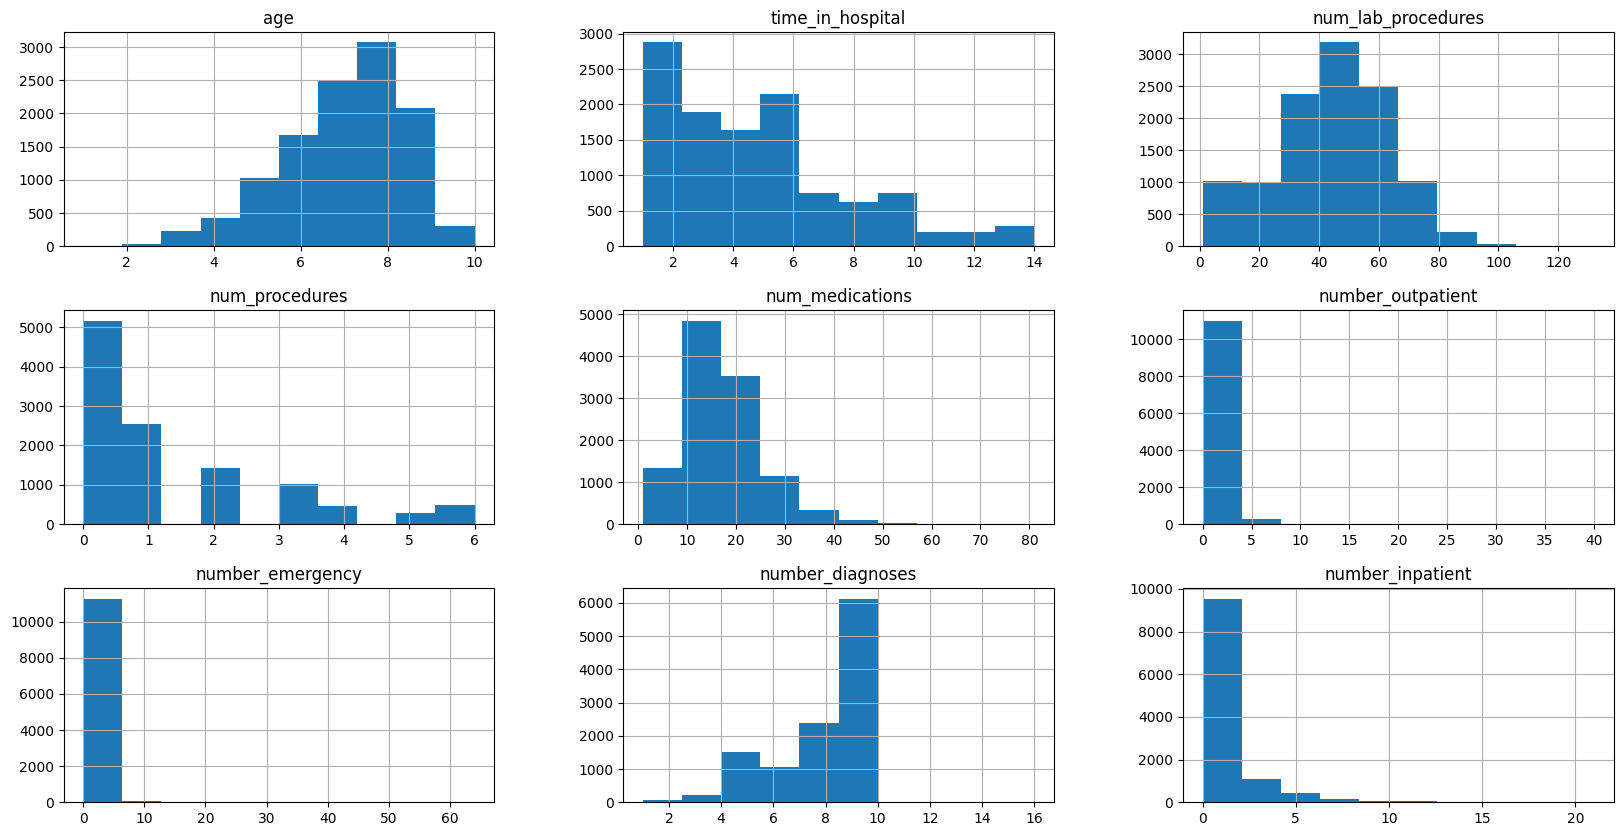

In [15]:
diabetes[numerical].hist(figsize=(20,10));

# Categorical Feautres
* gender
* race
* admission_type_id
* admission_source_id
* medical_specialty
* discharge_disposition_id
* medical_specialty
* diag_1
* diag_2
* diag_3
 

### Gender

In [16]:
print (f'{round(diabetes["gender"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(diabetes, x="gender", title='Gender', width=500, height=500)
fig.show()

1    54.17
2    45.83
Name: gender, dtype: float64


In [17]:
print (f'{round(diabetes["race"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(diabetes, x="race", title='Race', width=500, height=500)
fig.show()

3    75.65
1    18.98
4     1.87
0     1.66
5     1.28
2     0.57
Name: race, dtype: float64


In [18]:
print (f'{round(diabetes["admission_type_id"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(diabetes, x="admission_type_id", title='Admission_type_id', width=500, height=500)
fig.show()

1    54.78
2    18.19
3    17.27
6     5.16
5     4.36
8     0.24
4     0.01
Name: admission_type_id, dtype: float64


In [19]:
print (f'{round(diabetes["discharge_disposition_id"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(diabetes, x="discharge_disposition_id", title='discharge_disposition_id', width=750, height=750)
fig.show()

1     49.33
3     18.02
6     14.42
22     4.86
18     4.04
2      3.01
5      2.17
4      0.92
25     0.81
7      0.79
28     0.45
23     0.26
15     0.25
14     0.21
13     0.17
8      0.13
9      0.08
24     0.06
12     0.02
Name: discharge_disposition_id, dtype: float64


In [20]:
print (f'{round(diabetes["admission_source_id"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(diabetes, x="admission_source_id", title='admission_source_id', width=750, height=750)
fig.show()

7     59.17
1     27.56
17     6.22
4      2.72
6      1.87
2      0.98
5      0.89
3      0.26
20     0.19
9      0.11
8      0.02
22     0.02
Name: admission_source_id, dtype: float64


In [21]:
print (f'{round(diabetes["medical_specialty"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(diabetes, x="medical_specialty", title='Medical Specialty', width=1000, height=750)
fig.show()

0     50.90
19    14.49
12     7.77
9      7.45
4      3.74
63     3.01
20     2.18
28     1.33
48     0.92
53     0.91
52     0.85
29     0.81
70     0.65
72     0.60
26     0.58
13     0.55
44     0.53
61     0.38
16     0.35
25     0.28
65     0.28
15     0.23
34     0.14
21     0.11
69     0.10
46     0.09
51     0.07
18     0.07
54     0.07
67     0.06
10     0.05
60     0.05
59     0.04
17     0.04
56     0.03
1      0.03
36     0.03
30     0.03
71     0.02
27     0.02
45     0.02
42     0.02
31     0.02
23     0.02
64     0.01
3      0.01
2      0.01
50     0.01
33     0.01
62     0.01
24     0.01
5      0.01
38     0.01
39     0.01
32     0.01
55     0.01
11     0.01
Name: medical_specialty, dtype: float64


In [22]:
print (f'{round(diabetes["diag_1"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(diabetes, x="diag_1", title='Diag 1', width=750, height=750)
fig.show()

428    8.52
414    5.24
410    3.28
434    2.90
486    2.76
       ... 
347    0.01
796    0.01
694    0.01
685    0.01
V53    0.01
Name: diag_1, Length: 441, dtype: float64


In [23]:
print (f'{round(diabetes["diag_2"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(diabetes, x="diag_2", title='Diag 2', width=750, height=750)
fig.show()

428    7.41
276    7.13
427    4.96
250    3.93
403    3.78
       ... 
214    0.01
354    0.01
620    0.01
618    0.01
423    0.01
Name: diag_2, Length: 421, dtype: float64


In [24]:
print (f'{round(diabetes["diag_3"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(diabetes, x="diag_3", title='Diag 3', width=750, height=750)
fig.show()

250    8.66
401    6.06
276    5.31
428    4.93
427    4.04
       ... 
890    0.01
201    0.01
751    0.01
958    0.01
750    0.01
Name: diag_3, Length: 465, dtype: float64


In [25]:
print (f'{round(diabetes["max_glu_serum"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(diabetes, x="max_glu_serum", title='Max Glucose Serum', width=500, height=500)
fig.show()

0      94.18
140     2.60
200     1.63
300     1.59
Name: max_glu_serum, dtype: float64


In [26]:
print (f'{round(diabetes["A1Cresult"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(diabetes, x="A1Cresult", title='A1C', width=500, height=500)
fig.show()
######IMPORTANT IN REGARDS TO DIABETES TYPE 2 

0    85.24
8     7.14
4     4.24
7     3.37
Name: A1Cresult, dtype: float64


In [27]:
print (f'{round(diabetes["change"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(diabetes, x="change", title='Changes In Medication?', width=500, height=500)
fig.show()

0    51.06
1    48.94
Name: change, dtype: float64


In [28]:
print (f'{round(diabetes["diabetesMed"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(diabetes, x="diabetesMed", title='Has Diabetes Meds?', width=500, height=500)
fig.show()

1    80.22
0    19.78
Name: diabetesMed, dtype: float64


# Bivariate Analysis

### Gender and Age

In [42]:
fig = px.histogram(diabetes, x="age", color="gender",width=600, height=400)
fig.show()

In [41]:
prob_by_gender = diabetes.groupby("age")["gender"].value_counts(normalize=True)
# Print the results
print(prob_by_gender)

age  gender
1    2         0.666667
     1         0.333333
2    1         0.600000
     2         0.400000
3    1         0.750000
     2         0.250000
4    1         0.570755
     2         0.429245
5    2         0.502434
     1         0.497566
6    1         0.510192
     2         0.489808
7    2         0.517986
     1         0.482014
8    1         0.532747
     2         0.467253
9    1         0.616939
     2         0.383061
10   1         0.719355
     2         0.280645
Name: gender, dtype: float64


A Female has a probability of 100.0% to be readmitted after 30 days

A Male has a probability of 100.0% to be readmitted after 30 days


### Race and gender

In [48]:
fig = px.histogram(diabetes, x="race", color="gender",width=600, height=500)
fig.show()

In [49]:
prob_by_race = diabetes.groupby("race")["gender"].value_counts(normalize=True)
# Print the results
print(prob_by_race)

race  gender
0     2         0.515957
      1         0.484043
1     1         0.603248
      2         0.396752
2     2         0.630769
      1         0.369231
3     1         0.530726
      2         0.469274
4     2         0.528302
      1         0.471698
5     1         0.531034
      2         0.468966
Name: gender, dtype: float64


In [52]:
race_dict = {0: "Unknown", 1: "African Americans", 2: "Asian", 3: "Caucasian", 4: "Hispanic", 5: "Other"}

for race in sorted(race_dict.keys()):
    readmitted_probs = diabetes[diabetes["race"] == race]["gender"].value_counts(normalize=True)
    print(f"{race_dict[race]} males have a probability of being readmitted <30 days: {readmitted_probs[2]*100:.2f}%")
    print(f"{race_dict[race]} female have a probability of being readmitted <30 days: {readmitted_probs[1]*100:.2f}%")

Unknown males have a probability of being readmitted <30 days: 51.60%
Unknown female have a probability of being readmitted <30 days: 48.40%
African Americans males have a probability of being readmitted <30 days: 39.68%
African Americans female have a probability of being readmitted <30 days: 60.32%
Asian males have a probability of being readmitted <30 days: 63.08%
Asian female have a probability of being readmitted <30 days: 36.92%
Caucasian males have a probability of being readmitted <30 days: 46.93%
Caucasian female have a probability of being readmitted <30 days: 53.07%
Hispanic males have a probability of being readmitted <30 days: 52.83%
Hispanic female have a probability of being readmitted <30 days: 47.17%
Other males have a probability of being readmitted <30 days: 46.90%
Other female have a probability of being readmitted <30 days: 53.10%


### Age groups and race

In [55]:
fig = px.histogram(diabetes, x="age", color="race",width=600, height=500)
fig.show()

In [63]:
prob_by_age = diabetes.groupby("age")["race"].value_counts(normalize=True)
# Print the results
print(prob_by_age)

age  race
1    3       1.000000
2    3       0.650000
     1       0.325000
     5       0.025000
3    3       0.686441
     1       0.288136
     0       0.016949
     4       0.004237
     5       0.004237
4    3       0.606132
     1       0.334906
     4       0.028302
     5       0.025943
     0       0.004717
5    3       0.603700
     1       0.324245
     4       0.039922
     0       0.017527
     5       0.011685
     2       0.002921
6    3       0.702638
     1       0.247602
     4       0.016787
     5       0.014388
     0       0.013189
     2       0.005396
7    3       0.745404
     1       0.193845
     4       0.022382
     5       0.018385
     0       0.013189
     2       0.006795
8    3       0.799935
     1       0.147931
     0       0.016618
     4       0.015314
     5       0.011404
     2       0.008798
9    3       0.851299
     1       0.102021
     0       0.024062
     4       0.011068
     5       0.007218
     2       0.004331
10   3       0.848387


### A1C and change

In [64]:
fig = px.histogram(diabetes, x="A1Cresult", color="change",width=600, height=500)
fig.show()

In [65]:
prob_by_a1c = diabetes.groupby("A1Cresult")["change"].value_counts(normalize=True)
# Print the results
print(prob_by_a1c)

A1Cresult  change
0          0         0.525979
           1         0.474021
4          0         0.543568
           1         0.456432
7          1         0.524804
           0         0.475196
8          1         0.675709
           0         0.324291
Name: change, dtype: float64


#### dive a little deeper into alc and change

In [66]:
from scipy.stats import chi2_contingency

# Create a contingency table of A1C group and readmission rate
contingency_table = pd.crosstab(diabetes['A1Cresult'], diabetes['change'])
chi2, pval, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f"Chi-squared statistic: {chi2:.2f}")
print(f"P-value: {pval:.4f}")

Chi-squared statistic: 125.83
P-value: 0.0000


### Time stayed in hospital and num_medications

In [1]:
# from scipy.stats import ttest_ind
# t_stat, p_value = ttest_ind(diabetes['time_in_hospital'], diabetes['num_medications'])

# print results
# print('t-statistic:', t_stat)
# print('p-value:', p_value)


In [2]:
#fig = px.histogram(diabetes, x="time_in_hospital", color="num_medications",width=600, height=500)
#fig.show()

### Changes in diabetes medication and admission rates

In [139]:
fig = px.histogram(diabetes, x="change", color="readmitted",width=600, height=500)
fig.show()

In [142]:
fig = px.histogram(diabetes, x="diabetesMed", color="readmitted",width=600, height=500)
fig.show()

In [42]:
prob_by_change = diabetes.groupby("change")["readmitted"].value_counts(normalize=True)
# Print the results
print(prob_by_change)

change  readmitted
0       1             0.894092
        2             0.105908
1       1             0.881772
        2             0.118228
Name: readmitted, dtype: float64


In [43]:
prob_by_diabetesMed = diabetes.groupby("diabetesMed")["readmitted"].value_counts(normalize=True)
# Print the results
print(prob_by_diabetesMed)

diabetesMed  readmitted
0            1             0.904029
             2             0.095971
1            1             0.883733
             2             0.116267
Name: readmitted, dtype: float64


First taking a look at weather or not changes in medication have an effect on readmission rates and if those changes were towards diabetes medication: 
* patients who had a change in medication readmit 12% of the time in <30 days
* patients who had a change in diabetes medication were found to readmit (again) 12% of the time in <30 days 

## Multivariate analysis

#### LOS, Daignosis Codes, and Readmission <30 days 

In [20]:
#fig = px.scatter(diabetes[diabetes['readmitted'] == 1], x='time_in_hospital', y='diag_1', color='readmitted')
#fig.show()

#### Changes, Diabetes Medication Changes, and Readmission <30


## Metrics of Importanace

In [29]:
from sklearn.metrics import mutual_info_score
def cat_mut_inf(series):
    return mutual_info_score(series, diabetes['readmitted']) 

diabetes_cat = diabetes[categorical].apply(cat_mut_inf) 
diabetes_cat = diabetes_cat.sort_values(ascending=False).to_frame(name='mutual_info_score') 
diabetes_cat

mutual_info_score
diag_1                             0.008523
diag_3                             0.007619
discharge_disposition_id           0.007562
diag_2                             0.007105
medical_specialty                  0.001840
medical_specialty                  0.001840
admission_source_id                0.000269
admission_type_id                  0.000145
race                               0.000136
gender                             0.000008

### Correlation Matrix and Scatter Plots

In [30]:
diabetes[numerical].corr()

age  time_in_hospital  num_lab_procedures  \
age                 1.000000          0.107515            0.020770   
time_in_hospital    0.107515          1.000000            0.318450   
num_lab_procedures  0.020770          0.318450            1.000000   
num_procedures     -0.030104          0.191472            0.058066   
num_medications     0.041847          0.466135            0.268161   
number_outpatient   0.023724         -0.008916           -0.007602   
number_emergency   -0.087291         -0.009681           -0.002279   
number_diagnoses    0.242597          0.220186            0.152773   
number_inpatient   -0.042861          0.073623            0.039231   

                    num_procedures  num_medications  number_outpatient  \
age                      -0.030104         0.041847           0.023724   
time_in_hospital          0.191472         0.466135          -0.008916   
num_lab_procedures        0.058066         0.268161          -0.007602   
num_procedures            1.000000         0.385767          -0.024819   
num_medications           0.385767         1.000000           0.045197   
number_outpatient        -0.024819         0.045197           1.000000   
number_emergency         -0.038179         0.013180           0.091459   
number_diagnoses          0.073734         0.261526           0.094152   
number_inpatient         -0.066236         0.064194           0.107338   

                    number_emergency  number_diagnoses  number_inpatient  
age                        -0.087291          0.242597         -0.042861  
time_in_hospital           -0.009681          0.220186          0.073623  
num_lab_procedures         -0.002279          0.152773          0.039231  
num_procedures             -0.038179          0.073734         -0.066236  
num_medications             0.013180          0.261526          0.064194  
number_outpatient           0.091459          0.094152          0.107338  
number_emergency            1.000000          0.055539          0.266559  
number_diagnoses            0.055539          1.000000          0.104710  
number_inpatient            0.266559          0.104710          1.000000

In [34]:
diabetes.groupby('readmitted')[numerical].mean()

age  time_in_hospital  num_lab_procedures  num_procedures  \
readmitted                                                                   
1           7.086739          4.349224           42.953644        1.347123   
2           7.176015          4.768249           44.226028        1.280884   

            num_medications  number_outpatient  number_emergency  \
readmitted                                                         
1                 15.911137           0.360871          0.177803   
2                 16.903143           0.436911          0.357313   

            number_diagnoses  number_inpatient  
readmitted                                      
1                   7.388667          0.561648  
2                   7.692789          1.224003

In [48]:
diabetes[['time_in_hospital', 'num_procedures', 'num_lab_procedures', 'num_medications', 'readmitted']].corr()

time_in_hospital  num_procedures  num_lab_procedures  \
time_in_hospital            1.000000        0.191472            0.318450   
num_procedures              0.191472        1.000000            0.058066   
num_lab_procedures          0.318450        0.058066            1.000000   
num_medications             0.466135        0.385767            0.268161   
readmitted                  0.044199       -0.012227            0.020364   

                    num_medications  readmitted  
time_in_hospital           0.466135    0.044199  
num_procedures             0.385767   -0.012227  
num_lab_procedures         0.268161    0.020364  
num_medications            1.000000    0.038432  
readmitted                 0.038432    1.000000